In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220429.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 9.44 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 47.8 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-11-21 15:07:23--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response.

In [ ]:
!pip install transformers

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/DATA304'

/content/drive/MyDrive/DATA304


              price        label  factory_price  price_index
count  4.951000e+03  4951.000000   4.951000e+03  4951.000000
mean   3.266164e+05     1.958594   8.358315e+05   100.915336
std    2.169753e+05     0.252867   1.991910e+05     3.245415
min    1.500000e+04     0.000000   1.540000e+05    94.900000
25%    1.400000e+05     2.000000   7.898000e+05    95.960000
50%    3.000000e+05     2.000000   9.042000e+05   103.050000
75%    4.500000e+05     2.000000   9.240000e+05   103.050000
max    1.500000e+06     2.000000   1.283700e+06   103.050000


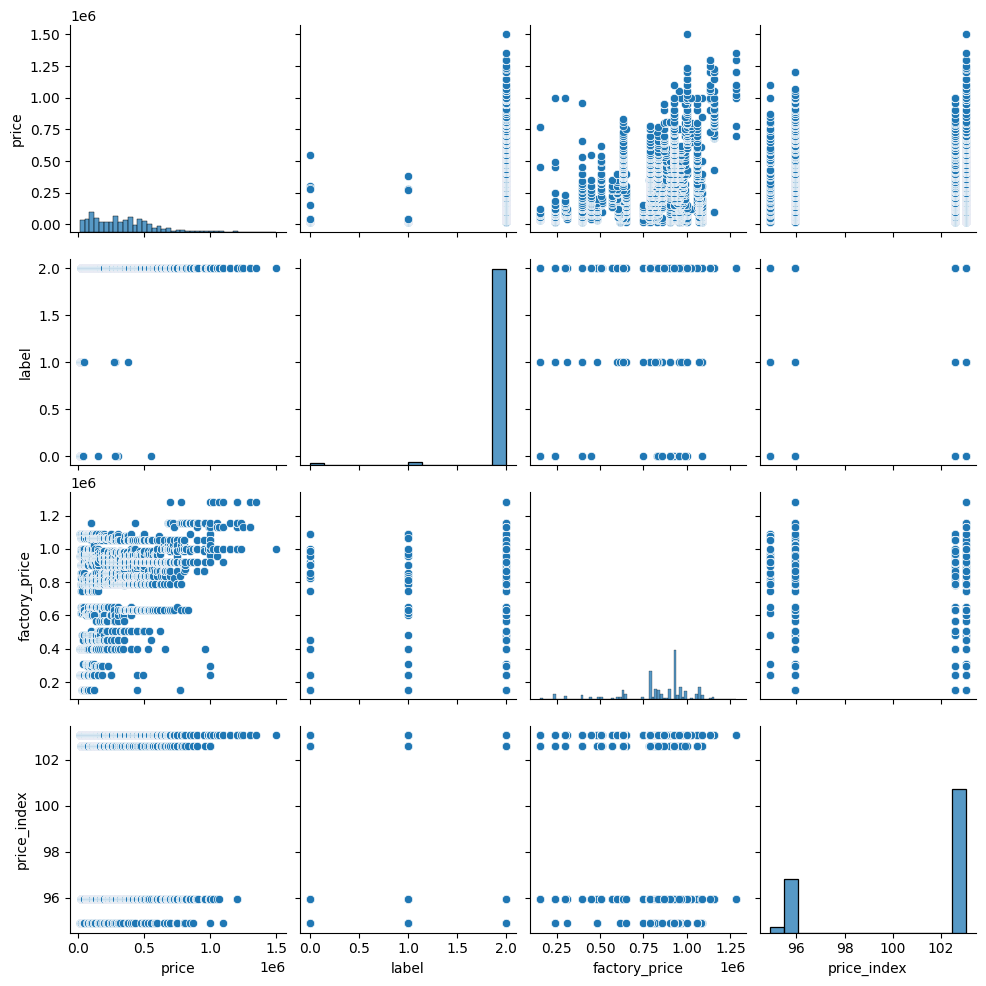

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('used_mobile_phone.csv')

data['create_date'] = pd.to_datetime(data['create_date'], format='%Y-%m-%d %I %M %S %p')
data.fillna(method='ffill', inplace=True)

print(data.describe())
sns.pairplot(data)
plt.show()

In [ ]:
import re
from tqdm import tqdm
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

stopwords_str = '''
아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마
하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도
아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할
생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등
제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면
뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자
제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오
왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍
뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠
된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어
결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로
말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저
마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써
갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신
어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서
형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대
이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여
때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들
타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로
말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면
이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을
낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에
있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼
이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에
이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵
탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되
수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들
지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓
'''

stopwords = stopwords_str.split()

def process_korean_text(text):
    text = text.lower()

    text = re.sub(r'[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9\s]', '', text)

    mecab = Mecab()
    tokens = mecab.morphs(text)

    tokens = [word for word in tokens if not word in stopwords]

    return ' '.join(tokens)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data['text_processed'] = data['text'].apply(process_korean_text)

vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(data['text_processed'])

data = data.drop(columns='text')
data = pd.get_dummies(data, columns=['phone_model', 'maker'])

In [ ]:
from transformers import BertModel, BertTokenizer
import torch

model_name = 'monologg/kobert'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name).to('cuda:0')

iter = 0

def text_to_avg_embedding(text):
    global iter

    if not iter % 100:
        print(iter, '/', len(data))

    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512).to('cuda:0')
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[0]
    avg_embedding = embeddings.mean(dim=0)

    iter += 1

    return avg_embedding.detach().cpu().numpy()

data['text_embedding'] = data['text_processed'].apply(text_to_avg_embedding)

0 / 4951
100 / 4951
200 / 4951
300 / 4951
400 / 4951
500 / 4951
600 / 4951
700 / 4951
800 / 4951
900 / 4951
1000 / 4951
1100 / 4951
1200 / 4951
1300 / 4951
1400 / 4951
1500 / 4951
1600 / 4951
1700 / 4951
1800 / 4951
1900 / 4951
2000 / 4951
2100 / 4951
2200 / 4951
2300 / 4951
2400 / 4951
2500 / 4951
2600 / 4951
2700 / 4951
2800 / 4951
2900 / 4951
3000 / 4951
3100 / 4951
3200 / 4951
3300 / 4951
3400 / 4951
3500 / 4951
3600 / 4951
3700 / 4951
3800 / 4951
3900 / 4951
4000 / 4951
4100 / 4951
4200 / 4951
4300 / 4951
4400 / 4951
4500 / 4951
4600 / 4951
4700 / 4951
4800 / 4951
4900 / 4951


In [ ]:
data = data.drop(columns = 'text_processed')

In [ ]:
from sklearn.decomposition import PCA

embeddings = np.array(data['text_embedding'].tolist())

pca = PCA(n_components=0.8)

pca_embeddings = pca.fit_transform(embeddings)

n_components = pca.n_components_
print(f'Number of components to preserve 80% variance: {n_components}')

Number of components to preserve 80% variance: 40


In [ ]:
for i in range(n_components):
    data[f'pca_{i}'] = pca_embeddings[:, i]

data = data.drop(columns='text_embedding')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import numpy as np

data['year'] = data['create_date'].dt.year
data['month'] = data['create_date'].dt.month
data['day'] = data['create_date'].dt.day
data = data.drop('create_date', axis=1)

In [ ]:
from sklearn.semi_supervised import LabelSpreading

labeled_data = data.iloc[:200]
unlabeled_data = data.iloc[200:]

unlabeled_data['label'] = -1

combined_data = pd.concat([labeled_data, unlabeled_data])

X_combined = combined_data.drop('label', axis=1)
y_combined = combined_data['label']

label_spread_model = LabelSpreading()
label_spread_model.fit(X_combined, y_combined)

y_unlabeled_pred = label_spread_model.transduction_[200:]

X_test = unlabeled_data.drop('label', axis=1)

<ipython-input-33-0b06de689015>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled_data['label'] = -1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


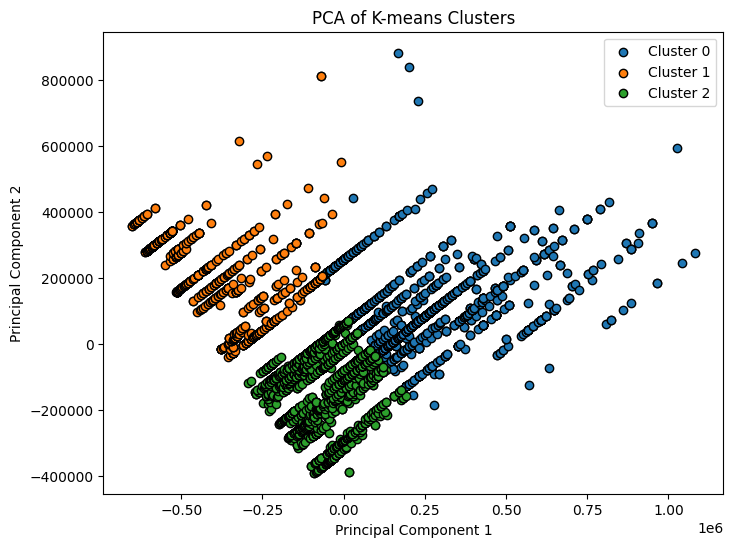

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_combined)

cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

plt.figure(figsize=(8, 6))
unique_labels = np.unique(cluster_labels)

for label in unique_labels:
    idx = cluster_labels == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'Cluster {label}', edgecolor='k')

plt.title('PCA of K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, cluster_labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

scores_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (scores_logreg.mean(), scores_logreg.std() * 2))

y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Accuracy: 0.99 (+/- 0.01)
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       348
           1       0.98      0.99      0.98       142
           2       1.00      0.99      0.99       501

    accuracy                           0.99       991
   macro avg       0.98      0.99      0.99       991
weighted avg       0.99      0.99      0.99       991



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5)
print("SVM Accuracy: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.94 (+/- 0.02)
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       348
           1       0.99      0.96      0.97       142
           2       0.96      0.97      0.96       501

    accuracy                           0.96       991
   macro avg       0.96      0.95      0.96       991
weighted avg       0.96      0.96      0.96       991



In [ ]:
import xgboost as xgb

xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)

scores_xgb = cross_val_score(xgboost_model, X_train, y_train, cv=5)
print("XGBoost Accuracy: %0.2f (+/- %0.2f)" % (scores_xgb.mean(), scores_xgb.std() * 2))

y_pred_xgb = xgboost_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 1.00 (+/- 0.00)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       348
           1       0.99      1.00      1.00       142
           2       1.00      1.00      1.00       501

    accuracy                           1.00       991
   macro avg       1.00      1.00      1.00       991
weighted avg       1.00      1.00      1.00       991



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy: 0.99 (+/- 0.01)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       348
           1       0.99      0.99      0.99       142
           2       1.00      1.00      1.00       501

    accuracy                           1.00       991
   macro avg       1.00      1.00      1.00       991
weighted avg       1.00      1.00      1.00       991



In [ ]:
original_data = pd.read_csv('used_mobile_phone.csv')
original_data

,create_date,price,label,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,0.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,1.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,0.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,0.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,0.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59
...,...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,NaN,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05
4947,2016-10-24 10 03 00 PM,1300000.0,NaN,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05
4948,2016-09-19 10 15 00 AM,1300000.0,NaN,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05
4949,2016-10-05 12 22 00 AM,1350000.0,NaN,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05


In [ ]:
import random

for _ in range(100):
    id = random.randint(0, len(cluster_labels))
    print(original_data['text'].iloc[id])
    print('Label:', cluster_labels[id])
    print('Index:', id)
    print()

아이폰6s 64gb 판매합니다 a급 
	                            직접거래
	                         아아이폰6s 64 실버 모델이구요 단품입니다 상태 정말좋구요 리퍼 내년 2월까지 가능합니다확정기변 선택약정 둘다 가능한 제품입니다직거래 택배거래 둘다가능하구요ㅕ직거래시 서울 동대문구 거래합니다 
Label: 0
Index: 4293

  노트3 블루 케이스 사은품   갤럭시 코어 세이프 블루   shw-m580d   3만5천원    이니스프리 퍼펙트 유브이 프로텍션 선크림 새거 판매합니다  d  노트3 케이스 사은품 갤럭시 코어 세이프 블루 + 갤럭시 노트3 코발트 블루 케이스   3만 5천원자급제 단말기라 kt , skt, lgu+외에도알뜰폰 통신사 등 어느 통신사나 가입해서 사용할 수 있는갤럭시 코어 세이프   shw -m580d   블루 색상과 중고 갤럭시 노트3 코발트 블루 케이스 3만 5천원에 판매합니다  d액정에 기스가 나 있는 것처럼 보이지만 액정 보호 필름을 붙인 상태라 떼고 새걸로 다시 붙여 사용하시면 아마 깨끗할거예요 ㅎㅎ사진과 같이 전체적으로 사용감은 좀 있구요 그래서 코어 세이프 케이스면 좋겠지만 노트3 케이스를 사은품으로 드려요~갤럭시 코어 시리즈 중에 코어 세이프는 세이프라는 이름에서 알 수 있듯이 안전을 목적으로 특화된 기능들이 있어요의료지 건강 상담및 대형병원의 진료 예약대행건강검진 설계 및 예약, 상담내역 결과조회등의건강 상담서비스위급 상황 발생 시 위젯, 앱, 잠금 화면을 이용하여 보호자에게 긴급sms를 전송하며 요청 시 출동요원이 긴급 출동하는 에스원 안심서비스부모님 혹은 자녀들의현재 위치에 대한 정보를 보호자가 쉽게 조회할수 있는 위치 조회서비스가 있다네요정상 해지하고 공장 초기화한 공기계이구요 할머니가 쓰시던 건데 중고나라에서 중고폰을 싸게 살 수 있다는 걸 모르고 대리점에서26만원에 구매했던 거랍니다ㅠㅠ편의점택배로 보내드리구요 택배비 3천5백원 추가해주세요~수수료 구매자 부담하시